In [27]:
import numpy as np
from scipy.interpolate import interp1d
from simpegEM1D import EM1DAnalytics
from simpegEM1D.Waveforms import (
    piecewise_ramp, piecewise_pulse, piecewise_pulse_fast,
    piecewise_ramp_fast, piecewise_ramp_fast_diff
    
)
from scipy.integrate import fixed_quad
from scipy.integrate.quadrature import _cached_roots_legendre
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sgkang/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def v_step(time):
    return EM1DAnalytics.dBzdtAnalCircT(
    10., time, 1e-1
    )

In [29]:
t_currents = np.r_[0., 0.002, 0.004]
T = t_currents.max()
currents = np.r_[0., 1., 0.]

In [30]:
def v_step_e(t):
    return 1./t
def v_ramp_off_e(t, t0):
    return 1./t0 * np.log((t+t0)/t)

def v_step_l(t):
    return t**(-5./2)
def v_ramp_off_l(t, t0):
    F_t_t0 = 2*t * (1-(1+t0/t)**-1.5) / (3*t0)
    return t**(-5./2) * F_t_t0
def v_step(time):
    return EM1DAnalytics.dBzdtAnalCircT(
    10., time, 1e-1
    )

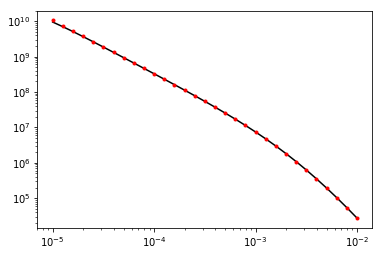

In [31]:
# single pulse
t_off = np.logspace(-5, -2, 31)
response_single = piecewise_ramp(v_step_l, t_off, t_currents, currents)
response_single_true = v_ramp_off_l(t_off, 2e-3)-v_ramp_off_l(t_off+0.002, 2e-3)
# double pulse
plt.loglog(t_off, response_single, 'k')
plt.loglog(t_off, response_single_true, 'r.')

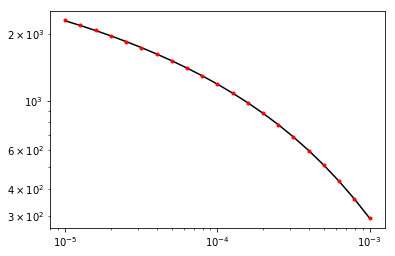

In [32]:
# single pulse
t_off = np.logspace(-5, -3, 21)
response_single = piecewise_ramp(v_step_e, t_off, t_currents, currents)
response_single_true = v_ramp_off_e(t_off, 2e-3)-v_ramp_off_e(t_off+0.002, 2e-3)
# double pulse
plt.loglog(t_off, response_single, 'k')
plt.loglog(t_off, response_single_true, 'r.')

In [33]:
def v_step_exp(t, tau=5e-3):
    return 1./tau * np.exp(-t/tau)
def v_ramp_off_exp(t, t0, tau=5e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + np.exp(-(t)/tau))
def v_ramp_off_exp_on(t, t0, tau=5e-3):
    return 1./t0 * (- np.exp(-(t+t0)/tau) + 1.)

In [34]:
time = np.logspace(-6, -3, 31) - 1e-5

In [35]:
response_single = piecewise_ramp(v_step_exp, time, t_currents, currents)
response_single_true_off = (
    v_ramp_off_exp(time[time>=0.], 2e-3)-
    v_ramp_off_exp(time[time>=0.]+0.002, 2e-3)
)
response_single_true_on = (
    v_ramp_off_exp_on(time[time<0.], 2e-3)-
    v_ramp_off_exp(time[time<0.]+0.002, 2e-3)
)


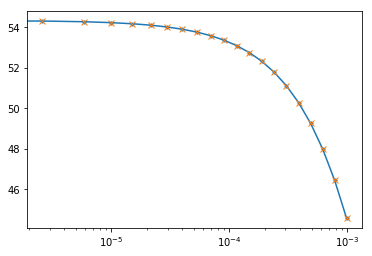

In [36]:
plt.plot(time, response_single, '.-')
plt.plot(time, np.r_[response_single_true_on, response_single_true_off], 'x')
plt.xscale('log')


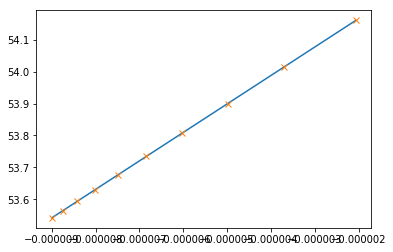

In [37]:
plt.plot(time[time<0.], response_single_true_on)
plt.plot(time[time<0.], response_single[time<0.], 'x')

In [ ]:
t_currents = np.r_[0., 0.002, 0.003,  0.004]
T = t_currents.max()
currents = np.r_[0., 1., 0.5, 0.]

In [39]:
x, w = _cached_roots_legendre(5)
response_single= piecewise_ramp_fast(
    v_step_exp, time, t_currents, currents, x, w
)

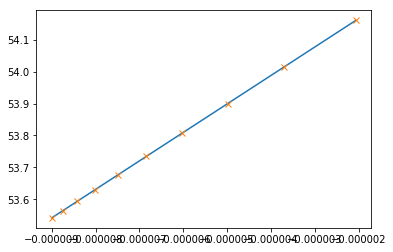

In [40]:
plt.plot(time[time<0.], response_single_true_on)
plt.plot(time[time<0.], response_single[time<0.], 'x')

In [41]:
response_single[time<0.]

array([53.54153361, 53.5646529 , 53.59375666, 53.63039343, 53.6765121 ,
       53.7345653 , 53.80763922, 53.89961681, 54.01538278, 54.16108078])

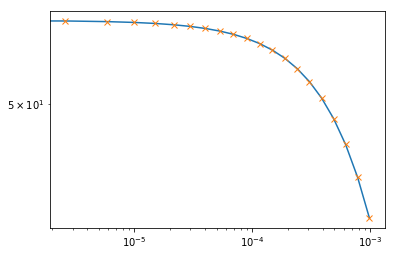

In [42]:
plt.loglog(time[time>=0.], response_single_true_off)
plt.loglog(time[time>=0.], response_single[time>=0.], 'x')

In [44]:
T = 1./25.
response_single = piecewise_pulse(
    v_step_exp, time, t_currents, currents, T, n_pulse=2
)
response_single_1 = piecewise_pulse_fast(
    v_step_exp, time, t_currents, currents, T, n_pulse=2
)

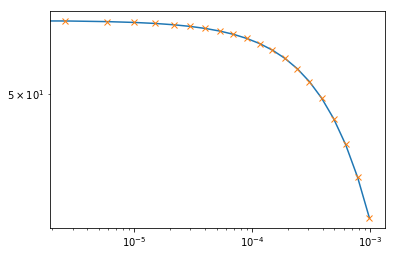

In [45]:
plt.loglog(time[time>=0.], response_single[time>=0.])
plt.loglog(time[time>=0.], response_single_1[time>=0.], 'x')

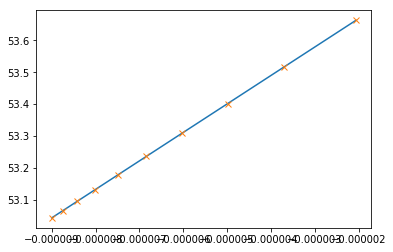

In [46]:
plt.plot(time[time<0.], response_single[time<0.])
plt.plot(time[time<0.], response_single_1[time<0.], 'x')

In [69]:
ramp = 1e-5
t_currents = np.r_[0., 0.002, 0.002+ramp]
T = t_currents.max()
currents = np.r_[0., 1., 0.]

In [70]:
response_single_em = piecewise_pulse_fast(
    v_step, time, t_currents, currents, T, n_pulse=2
)

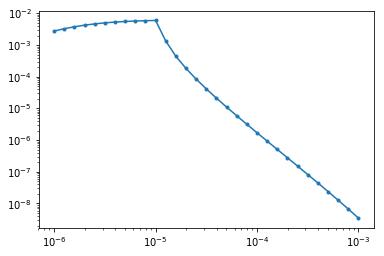

In [71]:
plt.loglog(time+ramp, -response_single_em, '.-')